# Model Out-of-plane-loss

Particle displacements with a z-component will lead to particle loss in the z-direction. Although new particles will enter the illuminated domain it means that particle-pairs (particles that exist in both images) are lost.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import synpivimage

In [2]:
cam = synpivimage.Camera(
    nx=256,
    ny=256,
    bit_depth=16,
    qe=1,
    sensitivity=1,
    baseline_noise=50,
    dark_noise=10,
    shot_noise=False,
    fill_ratio_x=1.0,
    fill_ratio_y=1.0,
    particle_image_diameter=4,  # px
    seed=100
)

laser = synpivimage.Laser(
    width=1,
    shape_factor=2
)

In [3]:
n = 2000
particles = synpivimage.Particles(
    x=np.random.uniform(-3, cam.nx+2, n),
    y=np.random.uniform(-4, cam.ny+2, n),
    z=np.random.uniform(-2, 2, n),
    size=np.ones(n)*3,
)

In [4]:
imgA, partA = synpivimage.take_image(laser,
                                     cam,
                                     particles,
                                     particle_peak_count=1000)

displaced_particles = partA.displace(dx=2.1, dy=3.4)

imgB, partB = synpivimage.take_image(laser,
                                     cam,
                                     displaced_particles,
                                     particle_peak_count=1000)

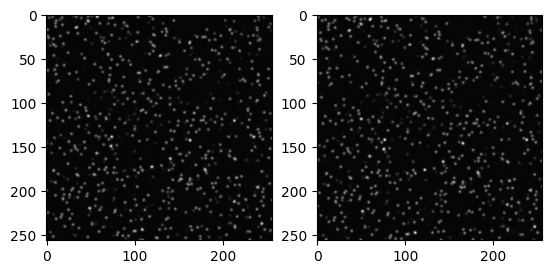

In [5]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(imgA, cmap='gray')
axs[1].imshow(imgB, cmap='gray')
plt.show()

## Compute out-of-plane-loss

We can compute the out-of-plane-loss by checking, whether the active particles in A are still active in B:

In [6]:
active_indices_A = np.argwhere(partA.active)
n_active_A = partA.active.sum()

In [7]:
n_lost_particles = n_active_A - partB.active[active_indices_A].sum()
print(f'lost particles: {n_lost_particles}')

lost particles: 16


In [8]:
active_B = partB.active[active_indices_A]

In [9]:
active_B.sum()

709

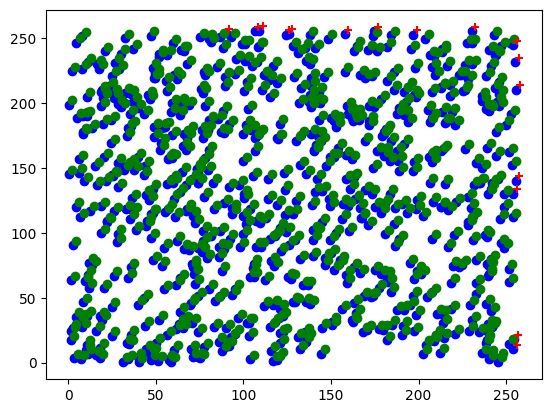

In [10]:
plt.scatter(partA.x[active_indices_A], partA.y[active_indices_A], color='b')
plt.scatter(partB.x[active_indices_A][active_B], partB.y[active_indices_A][active_B], color='g')
plt.scatter(partB.x[active_indices_A][~active_B], partB.y[active_indices_A][~active_B], color='r', marker='+')